In [1]:
using DataFrames, GraphPlot, Impute, Plots, Colors

include("funciones_de_red.jl")
include("objetos.jl")
include("dinamica_conductores.jl")
include("animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
function SquareDiGraph(n::Integer; doble_sentido = false)
    red = SimpleDiGraph(n^2)
    if doble_sentido
        for i in 1:n^2
            i_neighboors = []
            
            if i > n
                push!(i_neighboors, i-n)
            end
            if i ≤ n*(n-1)
                push!(i_neighboors, i+n)
            end
            if i%n != 1
                push!(i_neighboors, i-1)
            end
            if i%n != 0
                push!(i_neighboors, i+1)
            end
            for neighboor in i_neighboors
                add_edge!(red, i, neighboor)
            end
        end
    else
        set1 = vcat([i for i in 1:2:n], [i for i in n+1:2:2*n-1],[0])                
        for i in 1:n^2
            i_neighboors = []
            if i > n && (i%(n*2) in set1)
                push!(i_neighboors, i-n)
            end
            if i ≤ n*(n-1) && !(i%(n*2) in set1)
                push!(i_neighboors, i+n)
            end
            if i%n != 1 && (i%(n*2) in 1:n)
                push!(i_neighboors, i-1)
            end
            if i%n != 0 && !(i%(n*2) in 1:n)
                push!(i_neighboors, i+1)
            end
            for neighboor in i_neighboors
                add_edge!(red, i, neighboor)
            end
        end
    end

    position_array = [[(i-1)%n, div(i-0.01,n)] for i in 1:n^2]*100. #las calles miden 100m;
    return red, position_array, distance_matrix(position_array)
end

SquareDiGraph (generic function with 1 method)

In [3]:
k = 5
m = k^2
SquareNet, position_array, dist_matrix = SquareDiGraph(k, doble_sentido=true);

In [4]:
k = 5
m = k^2
SquareNet, position_array, dist_matrix = SquareDiGraph(k, doble_sentido=false);

In [126]:
g = SquareNet
nodelabel = 1:LightGraphs.nv(g)

x_positions =  [element[1] for element in position_array]
y_positions =  [element[2] for element in position_array]

city_matrix = zeros(m,m,4);
f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]
city_matrix[:,:,1] = dist_matrix./f(position_array);
city_matrix[:,:,2] = dist_matrix.*3/5;
city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);
red_cuadrada=network(SquareNet,position_array,city_matrix);

In [127]:
function plot_digraph(g; attribute_matrix = ones(nv(g),nv(g)), separated_edges = false)
    fig = plot()
    
    c1 = colorant"red"
    c2 = colorant"green"
    
    if attribute_matrix != ones(nv(g),nv(g))
        new_matrix1 = zeros(nv(g),nv(g))
        new_matrix2 = Inf*ones(nv(g),nv(g))
        for e in collect(edges(g))
            u = src(e)
            v = dst(e)
            new_matrix1[u,v] = attribute_matrix[u,v]
            new_matrix2[u,v] = attribute_matrix[u,v]
        end

        cols = range(c1, stop=c2,
            length=floor(Int,maximum(new_matrix1))-floor(Int,minimum(new_matrix2))+1)
    else
        cols = ["black" for i in 1:ne(g)]
        new_matrix2 = attribute_matrix
    end
    
    for e in collect(edges(g))
        u = src(e)
        v = dst(e)

        pos_u = deepcopy(position_array[u])
        pos_v = deepcopy(position_array[v])
        
        
        if separated_edges
        
            if which_different(pos_u,pos_v)[1] == 1
                if pos_u[1] < pos_v[1]
                    pos_u[2] -= 2. 
                    pos_v[2] -= 2.
                else
                    pos_u[2] += 2. 
                    pos_v[2] += 2.
                end
            end

            if which_different(pos_u,pos_v)[1] == 2
                if pos_u[2] < pos_v[2]
                    pos_u[1] -= 2. 
                    pos_v[1] -= 2.
                else
                    pos_u[1] += 2. 
                    pos_v[1] += 2.
                end
            end
        end
        
    
        plot!([pos_u[1],pos_v[1]],[pos_u[2],pos_v[2]], arrow=true,
        color=cols[floor(Int,attribute_matrix[u,v])-floor(Int,minimum(new_matrix2))+1],
        linewidth=2.,label="", aspect_ratio=1)
    end
    return(fig)
end

plot_digraph (generic function with 1 method)

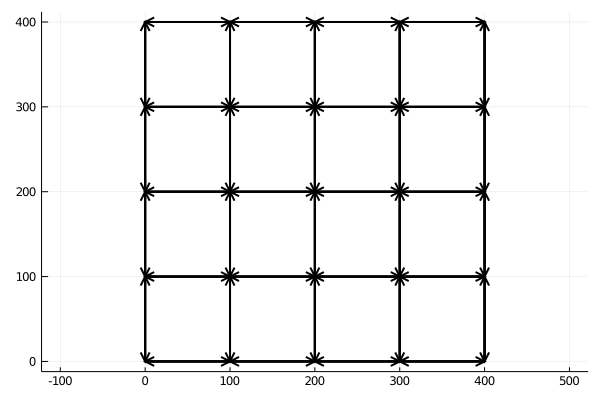

In [128]:
plot_digraph(g)#, attribute_matrix=city_matrix[:,:,4],separated_edges=true)

In [129]:
A = reshape(1:625,25 ,25);
A = A./2.5

25×25 Array{Float64,2}:
  0.4  10.4  20.4  30.4  40.4  50.4  …  200.4  210.4  220.4  230.4  240.4
  0.8  10.8  20.8  30.8  40.8  50.8     200.8  210.8  220.8  230.8  240.8
  1.2  11.2  21.2  31.2  41.2  51.2     201.2  211.2  221.2  231.2  241.2
  1.6  11.6  21.6  31.6  41.6  51.6     201.6  211.6  221.6  231.6  241.6
  2.0  12.0  22.0  32.0  42.0  52.0     202.0  212.0  222.0  232.0  242.0
  2.4  12.4  22.4  32.4  42.4  52.4  …  202.4  212.4  222.4  232.4  242.4
  2.8  12.8  22.8  32.8  42.8  52.8     202.8  212.8  222.8  232.8  242.8
  3.2  13.2  23.2  33.2  43.2  53.2     203.2  213.2  223.2  233.2  243.2
  3.6  13.6  23.6  33.6  43.6  53.6     203.6  213.6  223.6  233.6  243.6
  4.0  14.0  24.0  34.0  44.0  54.0     204.0  214.0  224.0  234.0  244.0
  4.4  14.4  24.4  34.4  44.4  54.4  …  204.4  214.4  224.4  234.4  244.4
  4.8  14.8  24.8  34.8  44.8  54.8     204.8  214.8  224.8  234.8  244.8
  5.2  15.2  25.2  35.2  45.2  55.2     205.2  215.2  225.2  235.2  245.2
  5.6  15.6  2

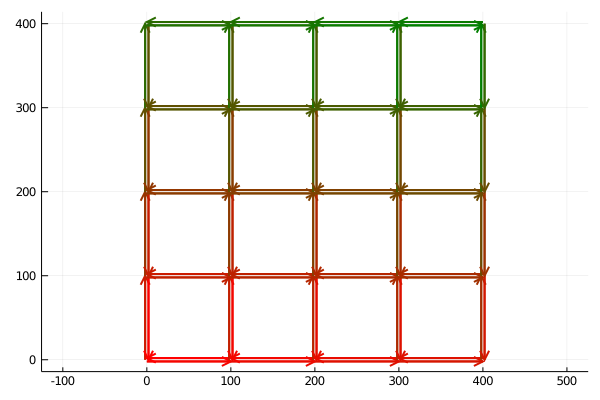

In [130]:
plot_digraph(g, attribute_matrix=A,separated_edges=true)

In [131]:
SquareNet, position_array, dist_matrix = SquareDiGraph(13, doble_sentido=false);

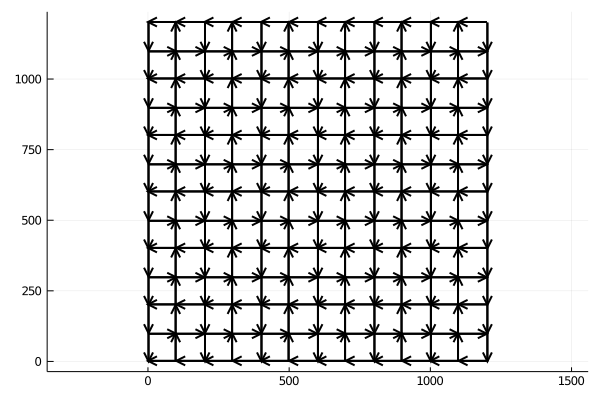

In [132]:
plot_digraph(SquareNet, separated_edges = true)

In [133]:
SquareNet, position_array, dist_matrix = SquareDiGraph(13, doble_sentido=true);

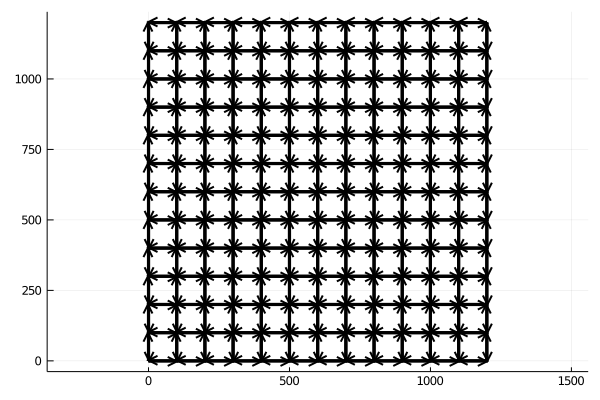

In [134]:
plot_digraph(SquareNet, separated_edges = true)